- 

# Class will start at 6:05 PM

In the meantime... fun fact!

- 'Bold Glamour' filter on TikTok uses AI and not AR https://www.theverge.com/2023/3/2/23621751/bold-glamour-tiktok-face-filter-beauty-ai-ar-body-dismorphia


- We’re getting to a new place where it’s not just augmenting reality, it’s replacing reality.
- It uses GAN (Generative Adversarial Networks):  "GANs pit two competing neural networks against each other in a fist-fight"

# Week 3: Model setup and intro to regression models
### Intro to Machine Learning | Professional Certificate course 

Viviana Marquez,  M.Sc.<br>
March 8, 2023

<br>

<img src='../img/all/di.jpeg' style='width:500px; float: left; margin: 0px 30px 15px 0px'>

# ❇️ Housekeeping

## Office hours

More office hours:
- Friday, March 10 @ 12PM PST
- Monday, March 13 @ 6PM PST
- Friday, March 17 @ 12PM PST
- Monday, March 20 @ 6PM PST
- Friday, March 24 @ 12PM PST
- Monday, March 27 @ 6PM PST
- Monday, April 3 @ 6PM PST

Zoom link on Canvas

# 🚀 Today's agenda

**Part 1:**

- Finish up Feature Engineering
- Underfitting vs overfitting / Bias-Variance trade-off
- How to select a model?
- Intro to performance metrics

# 🚀 Today's agenda

**Part 2:**
- Linear Regression
- Gradient Descent
- Regularized linear models
- RMSE / R squared

# ⏪ Last class recap

- Getting data
- Pandas crash course
- EDA: Exploratory Data Analysis
- Train, validation, and test data sets
- Data cleaning and feature engineering 

### Conda environment commands

- `conda activate IntroML`
    - Launch `jupyter notebook`
    
    
### Alternative

Google Colab: https://colab.research.google.com/

# 🚀 Part 1

# ❇️ Finish up Feature Engineering

<br>
<center>
    <img src='../img/class_3/cinderella.gif' style='height:350px;'>
</center>

# EDA

<br>
<center>
    <img src='../img/class_2/pipeline_EDA.png' style='height:300px;'>
</center>

- Exploratory Data Analysis is the process of performing initial investigations on data to be able to understand it, identify patters and relationships between variables, detect outliers and anomalies with the help of summary statistics and data visualizations.

- By exploring the data in this way, data professionals can check the overall health of their data and gain insights and make informed decisions about how to approach further analysis or modeling

# Feature Engineering 
<br>
<center>
    <img src='../img/class_2/pipeline_FE.png' style='height:300px;'>
</center>

- Feature engineering is the process of selecting and transforming raw data into features that can be used to train machine learning models
- AKA creating/changing number of columns

# ⚠️⚠️⚠️ We need split the data into train/validation/test data sets!

- It is important to separate the data into training, validation, and test sets **BEFORE** doing any data cleaning or feature engineering to prevent <u>data leakage</u> and ensure that the model is evaluated on unseen data.


- **Training dataset:** Used to train machine learning model
- **Validation dataset:** Used to tune the model's hyperparameters 
- **Test datatset:** Evaluate the model's performance on unseen data

<img src='../img/class_2/cali.png' style='height:500px; float: left; margin: 0px 100px 0px 0px'>


Download data from [here](https://raw.githubusercontent.com/vivianamarquez/Intro-to-Machine-Learning/main/data/housing.csv)

 - California Housing Prices dataset
     - 1990 California census
     
     
Task: Create a model to predict median house value based on the other features of the dataset

In [1]:
import pandas as pd
df = pd.read_csv("../data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# target variable
y = df[['median_house_value']]
y.head(3)

,median_house_value
0,452600.0
1,358500.0
2,352100.0


In [4]:
# attributes
df.columns
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]
X.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY


In [5]:
# Assuming X is your feature matrix and y is your target variable
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
# Split the training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111111, random_state=42) #0.25

In [7]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15920,-117.78,33.51,44.0,1833.0,331.0,515.0,268.0,6.6178,<1H OCEAN
18081,-118.05,33.86,16.0,2851.0,626.0,1985.0,603.0,5.4089,<1H OCEAN
14694,-122.41,37.76,52.0,351.0,81.0,308.0,75.0,2.6667,NEAR BAY
20478,-117.30,34.15,33.0,1607.0,282.0,608.0,260.0,4.3438,INLAND
18634,-121.75,37.69,26.0,2647.0,536.0,1422.0,522.0,3.7212,INLAND


In [8]:
print(f"Percentage of observations in the train dataset: {X_train.shape[0]/df.shape[0]*100}%")
print(f"Percentage of observations in the val dataset: {X_val.shape[0]/df.shape[0]*100}%")
print(f"Percentage of observations in the test dataset: {X_test.shape[0]/df.shape[0]*100}%")

Percentage of observations in the train dataset: 80.0%
Percentage of observations in the val dataset: 10.0%
Percentage of observations in the test dataset: 10.0%


# Why do we do data cleaning and feature engineering?

<br><br>
<center>
    <img src='../img/class_0/gigo.png' style='height:300px;'>
</center>

- Objective: Improve data quality, making it suitable for modeling

# 🛁 Data cleaning

- Included but not limited to: 
    - Handling missing values: drop them or account for them 
    - Handling outliers: drop them or account for them or keep them
    - Remove duplicates
    - Handling incorrect data types
    - Handling inconsistent data (example: age shouldn't be negative)

# 🏗 Feature engineering 

- Included but not limited to: 
    - Handling categorical attributes
            - Ordinal encoder: Assumes two nearby values are more similar to each other
            - One-Hot encoder: One binary category per attribute
    - Custom feature engineering  ♊
    - ✨ Feature scaling 
            - MinMax 
            - Standarization 
            
- ✨ Putting it all together

### Feature Scaling

- With few exceptions, machine learning algorithms don't perform well when the input of the numerical values have very different scales
- Example in this dataset: `total_rooms`, `median_income`

The most common ones:
- MinMax scaling
- Standarization

### MinMax

- AKA normalization
- Values are shifted and rescaled so that they end up ranging from 0 to 1
- How to calculate it? Subtracting the min val and diving by the difference between the min and the max

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))

X_train_numerical_features = X_train.select_dtypes(include=[np.number])
X_train_num_min_max_scaled = min_max_scaler.fit_transform(X_train_numerical_features)

In [10]:
pd.DataFrame(X_train_num_min_max_scaled,
              columns = X_train_numerical_features.columns, index=X_train_numerical_features.index).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
15920,0.654382,0.103082,0.843137,0.056123,0.051210,0.014350,0.043907,0.421918
18081,0.627490,0.140276,0.294118,0.087326,0.096989,0.055551,0.098997,0.338547
14694,0.193227,0.554729,1.000000,0.010697,0.012415,0.008548,0.012169,0.149432
20478,0.702191,0.171095,0.627451,0.049195,0.043606,0.016957,0.042592,0.265093
18634,0.258964,0.547290,0.490196,0.081073,0.083023,0.039771,0.085677,0.222156


### Standarization

- How to calculate it? Subtract the mean value, then divide the result by the standard deviation
- It doesn't restrict the values to a specific range

In [11]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_num_std_scaled = std_scaler.fit_transform(X_train_numerical_features)

In [12]:
pd.DataFrame(X_train_num_std_scaled,
             columns = X_train_numerical_features.columns, 
             index=X_train_numerical_features.index).describe().round(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.0000,16512.0000,16512.0000,16512.0000,16341.0000,16512.0000,16512.0000,16512.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-2.3917,-1.4484,-2.1874,-1.2325,-1.2884,-1.2608,-1.3182,-1.7631
25%,-1.1076,-0.7967,-0.8390,-0.5514,-0.5792,-0.5620,-0.5788,-0.6850
50%,0.5362,-0.6466,0.0335,-0.2314,-0.2413,-0.2276,-0.2328,-0.1792
75%,0.7810,0.9758,0.6680,0.2411,0.2619,0.2645,0.2795,0.4521
max,2.6247,2.9640,1.8577,14.0290,14.1521,30.3015,14.7414,5.8066


# 🤔 When would you use standarization vs MinMax?

In [13]:
# data is capped at 15, numbers represent roughly tens of thousands of dollars
X_train_numerical_features['median_income'].describe()

count    16512.000000
mean         3.877279
std          1.915621
min          0.499900
25%          2.565175
50%          3.534100
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

- Suppose a district has a median income of 100 (by mistake)
- MinMax would map this outlier to 1 and squish all other values to 0-0.15
- Meanwhile, standarization is not so sensitive to outliers
- MinMax is better to use when the upper and lower boundaries are known

### More notes on feature scaling

- When a feature's distribution has a heavy tail, both MinMax and standarization will squash most values into a small range
- You should first transform it to shrink the heavy tail 
    - Square root
    - Log
    - Bucket the feature
    - and more...

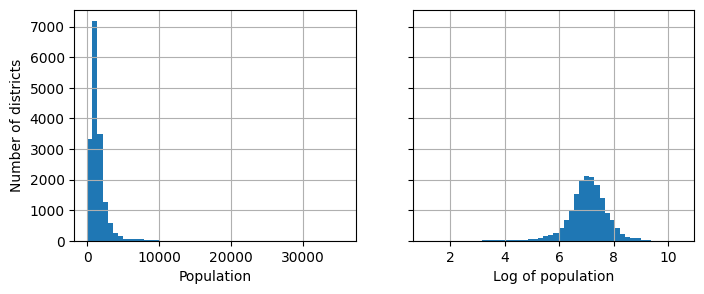

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

X_train["population"].hist(ax=axs[0], bins=50)
X_train["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")

plt.show()


# 🏗 Feature engineering 

- Included but not limited to: 
    - Handling categorical features: Ordinal encoder, OneHot encoder, etc.
    - Feature scaling: MinMax, standarizaton, square root, log, etc.
    - Feature extraction: Creating new features from existing ones
    - Text processing: TF-IDF, Word2Vec, BERT, GPT
    - Dimensionality reduction
- Depends on your dataset!

# ⚗️ Putting all of it together


In [15]:
X_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        171
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

- Impute the median to handle missing values
- One-Hot Encoder to handle categorical values
- Standartization 

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), 
                             StandardScaler())

cat_pipeline = make_pipeline(
    #SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [17]:
# if you get an error in this cell, make sure you have scikit-learn==1.2.1
# conda install scikit-learn=1.2.1
X_train_processed = pd.DataFrame(preprocessing.fit_transform(X_train),
                                 columns = preprocessing.get_feature_names_out(),
                                 index=X_train.index)

X_train_processed.head()

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
15920,0.890953,-0.993607,1.223207,-0.375939,-0.497649,-0.807894,-0.613104,1.430661,1.0,0.0,0.0,0.0,0.0
18081,0.756049,-0.829490,-0.997660,0.100266,0.212680,0.492494,0.271616,0.799567,1.0,0.0,0.0,0.0,0.0
14694,-1.422399,0.999243,1.857740,-1.069196,-1.099623,-0.991010,-1.122809,-0.631970,0.0,0.0,0.0,1.0,0.0
20478,1.130782,-0.693508,0.350724,-0.481658,-0.615636,-0.725625,-0.634232,0.243542,0.0,1.0,0.0,0.0,0.0
18634,-1.092634,0.966419,-0.204493,0.004838,-0.004030,-0.005546,0.057698,-0.081479,0.0,1.0,0.0,0.0,0.0


# 🤔 Do you notice something funny in here?

# 🚀 Part 2

See you here at @


### Check-in: https://forms.gle/iPGEKNwJP1c8ftSp8

# ⏪ Today's recap

- 

# 👮‍♀️ Misc:

- Self-graded quiz will be posted in the next hour
- 💪 Ungraded homework will be posted tonight or tomorrow morning
- Office hours on Friday at 12 PM PST and Monday 6 PM PST (Zoom link will be posted in Canvas) 

### Check-in: https://forms.gle/iPGEKNwJP1c8ftSp8

<center>
<img src='../img/all/bye.gif' style='height:400px;'> 
</center>

# Next class: Classification models